In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\USER\Downloads\KOL_KOL.csv")

In [3]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,2000,101.35,101.19,100.81,100.35,100.19,99.94,99.83,100.00,100.34,100.69,101.19,101.37,100.60
1,2001,101.30,101.01,100.86,100.58,100.11,99.79,99.80,99.96,100.40,100.80,101.30,101.64,100.63
2,2002,101.46,101.46,100.90,100.54,100.04,99.98,99.88,99.99,100.46,100.93,101.22,101.46,100.69
3,2003,101.62,101.31,101.00,100.59,100.21,99.79,100.01,100.02,100.32,100.90,101.34,101.56,100.72
4,2004,101.47,101.29,100.83,100.48,100.12,100.05,100.01,99.89,100.39,101.12,101.40,101.48,100.71


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [5]:
X = df.drop(['YEAR'], axis='columns')
y = df['YEAR']
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
len(X_train)

231

In [8]:
len(X_test)

99

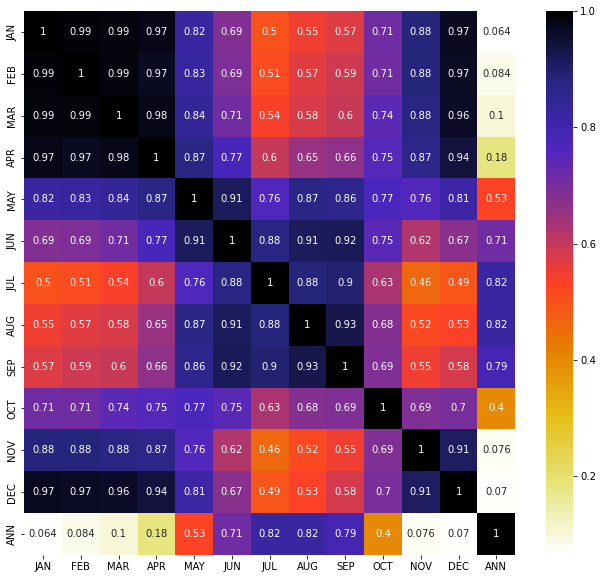

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(11,10))
cor=X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set() #Set of all names of correlated features
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

11

In [12]:
corr_features

{'ANN', 'APR', 'AUG', 'DEC', 'FEB', 'JUL', 'JUN', 'MAR', 'MAY', 'NOV', 'SEP'}

In [13]:
m=X.drop(corr_features,axis=1)
print(m)

        JAN     OCT
0    101.35  100.69
1    101.30  100.80
2    101.46  100.93
3    101.62  100.90
4    101.47  101.12
..      ...     ...
325    0.00  258.40
326    0.00   79.10
327    0.00  189.84
328   47.46  100.20
329    0.00  214.28

[330 rows x 2 columns]


In [14]:
from sklearn.metrics import accuracy_score


from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.shape, X_test.shape


((264, 13), (66, 13))

In [23]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [29]:
dtree_entropy=DecisionTreeClassifier(criterion="entropy", random_state=400, max_depth=12, min_samples_leaf=2)

In [30]:
dtree_entropy.fit(X_train,y_train)
prediction=dtree_entropy.predict(X_test)

In [31]:
import math
trainScore = dtree_entropy.predict(X_train)

In [32]:
testScore = dtree_entropy.predict(X_test)

In [33]:
y_test = lab_enc.fit_transform(y_test)
#trainScore = lab_enc.fit_transform(trainScore)
#testScore = lab_enc.fit_transform(testScore)
#trainScore = [round(value) for value in trainScore]
# evaluate predictions
accuracy = accuracy_score(y_train, trainScore)
accuracy
print(accuracy)
print("Training Accuracy: %.2f%%" % (accuracy * 100.0))
accuracy2 = accuracy_score(y_test, testScore)
print("Testing Accuracy: %.2f%%" % (accuracy2 * 100.0))

0.7083333333333334
Training Accuracy: 70.83%
Testing Accuracy: 13.64%
